# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow

In [2]:
# !pip install opencv-python 
# !pip install matplotlib

In [3]:
# !pip list 

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\siddh\AppData\Local\Temp\ipykernel_7532\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data' 

In [8]:
os.listdir(os.path.join(data_dir,'real'))

['real_00001.jpg',
 'real_00003.jpg',
 'real_00004.jpg',
 'real_00005.jpg',
 'real_00006.jpg',
 'real_00007.jpg',
 'real_00008.jpg',
 'real_00009.jpg',
 'real_00011.jpg',
 'real_00013.jpg',
 'real_00014.jpg',
 'real_00019.jpg',
 'real_00020.jpg',
 'real_00022.jpg',
 'real_00028.jpg',
 'real_00029.jpg',
 'real_00030.jpg',
 'real_00034.jpg',
 'real_00037.jpg',
 'real_00039.jpg',
 'real_00041.jpg',
 'real_00042.jpg',
 'real_00043.jpg',
 'real_00047.jpg',
 'real_00048.jpg',
 'real_00049.jpg',
 'real_00051.jpg',
 'real_00052.jpg',
 'real_00055.jpg',
 'real_00057.jpg',
 'real_00061.jpg',
 'real_00063.jpg',
 'real_00068.jpg',
 'real_00070.jpg',
 'real_00073.jpg',
 'real_00075.jpg',
 'real_00077.jpg',
 'real_00078.jpg',
 'real_00079.jpg',
 'real_00080.jpg',
 'real_00083.jpg',
 'real_00084.jpg',
 'real_00086.jpg',
 'real_00087.jpg',
 'real_00103.jpg',
 'real_00104.jpg',
 'real_00105.jpg',
 'real_00107.jpg',
 'real_00109.jpg',
 'real_00110.jpg',
 'real_00112.jpg',
 'real_00120.jpg',
 'real_00121

In [9]:
for image_class in os.listdir(data_dir):
    print(image_class) 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        pass
#         print(image)
    

fake
real


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
img = cv2.imread(os.path.join('data','real', 'real_00003.jpg'))

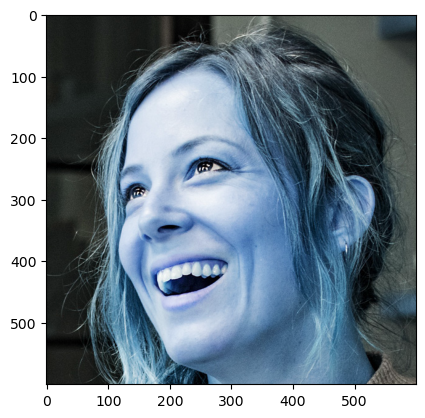

In [12]:
# type(img)     # Img datatype
# img.shape     # Image dimension
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
tf.keras.utils.image_dataset_from_directory??


In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 960 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
# data_iterator

In [19]:
# Run again to get another batch from the iterator
batch = data_iterator.next()

In [20]:
# Image representation as numpy arrays
# batch[0].shape
# 1 = realimages
# 0 =  fake images
batch[1]

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

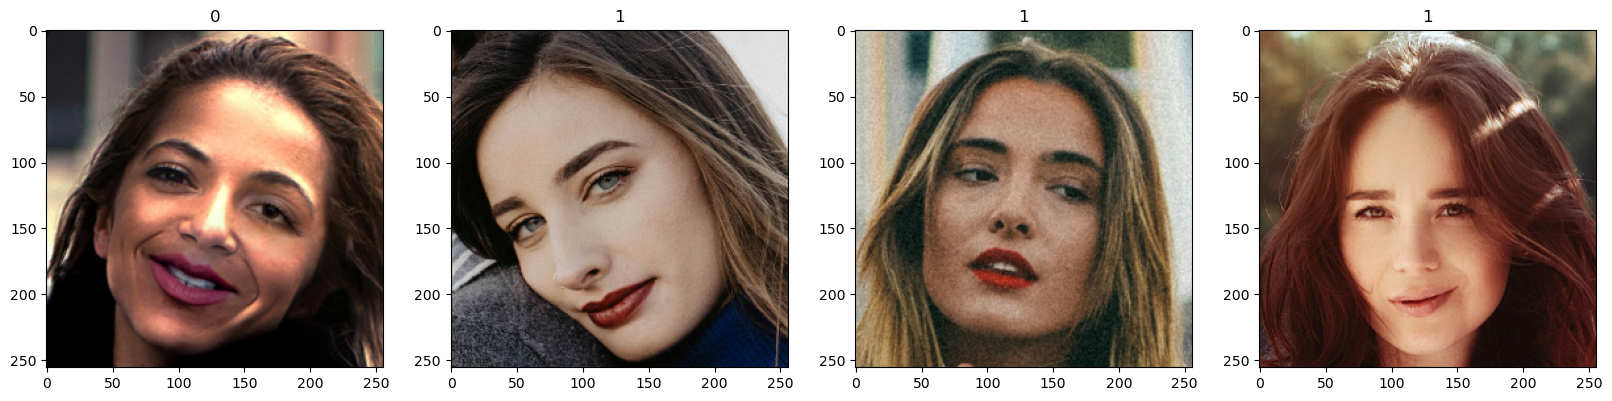

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Step2: Data Pre-processing

# 4. Scale Data

In [22]:
# batch[0].shape
# batch[0].min()
batch[0].max()


255.0

In [23]:

data = data.map(lambda x,y: (x/255, y))

In [24]:
# scaled_iterator = data.as_numpy_iterator()
data.as_numpy_iterator().next()

(array([[[[0.48669672, 0.71806926, 0.5376771 ],
          [0.48500785, 0.71245885, 0.52422357],
          [0.4834559 , 0.7176471 , 0.5400735 ],
          ...,
          [0.5455605 , 0.83685946, 0.7167002 ],
          [0.54381126, 0.84050244, 0.7176471 ],
          [0.5507286 , 0.8370644 , 0.7089394 ]],
 
         [[0.48754117, 0.71883136, 0.54105395],
          [0.48633483, 0.70986426, 0.5333936 ],
          [0.48631376, 0.7176078 , 0.540152  ],
          ...,
          [0.54901963, 0.8352941 , 0.71909565],
          [0.5491422 , 0.8352941 , 0.7176471 ],
          [0.54509807, 0.83137256, 0.7137255 ]],
 
         [[0.4868595 , 0.71203756, 0.5425858 ],
          [0.49154413, 0.71119124, 0.5347206 ],
          [0.4848652 , 0.70980394, 0.5439951 ],
          ...,
          [0.5556535 , 0.8343913 , 0.723178  ],
          [0.55827206, 0.83384556, 0.71909565],
          [0.5446356 , 0.831835  , 0.7137255 ]],
 
         ...,
 
         [[0.51072305, 0.7289216 , 0.59589463],
          [0.50551

In [25]:
# batch = scaled_iterator.next()

In [26]:
# batch[1]

In [27]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [28]:
len(data)

30

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train_size+test_size+val_size

30

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Step3: Deep Model

# 6. Build Deep Learning Model

In [32]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
MaxPooling2D??

In [36]:
# 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #softmax classification for more then 2 classification

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


21/21 [==============================] - 22s 720ms/step - loss: 0.8006 - accuracy: 0.5149 - val_loss: 0.6793 - val_accuracy: 0.5260
Epoch 2/20
21/21 [==============================] - 11s 475ms/step - loss: 0.6723 - accuracy: 0.5923 - val_loss: 0.6494 - val_accuracy: 0.6146
Epoch 3/20
21/21 [==============================] - 11s 475ms/step - loss: 0.6453 - accuracy: 0.6548 - val_loss: 0.6437 - val_accuracy: 0.6146
Epoch 4/20
21/21 [==============================] - 11s 490ms/step - loss: 0.6337 - accuracy: 0.6682 - val_loss: 0.6151 - val_accuracy: 0.6562
Epoch 5/20
21/21 [==============================] - 11s 476ms/step - loss: 0.5898 - accuracy: 0.6920 - val_loss: 0.6155 - val_accuracy: 0.6458
Epoch 6/20
21/21 [==============================] - 11s 503ms/step - loss: 0.5601 - accuracy: 0.7113 - val_loss: 0.6424 - val_accuracy: 0.6302
Epoch 7/20
21/21 [==============================] - 11s 479ms/step - loss: 0.5019 - accuracy: 0.7545 - val_loss: 0.5468 - val_accuracy: 0.71

In [42]:
hist.history

{'loss': [0.8006294965744019,
  0.6723112463951111,
  0.6453379392623901,
  0.6336948871612549,
  0.5897572636604309,
  0.5601176023483276,
  0.5019486546516418,
  0.4672202169895172,
  0.3901922106742859,
  0.29952704906463623,
  0.24397888779640198,
  0.20763567090034485,
  0.13514062762260437,
  0.1122530996799469,
  0.1492176353931427,
  0.128074049949646,
  0.1135796383023262,
  0.04768610745668411,
  0.02744615636765957,
  0.0238830354064703],
 'accuracy': [0.5148809552192688,
  0.5922619104385376,
  0.6547619104385376,
  0.668154776096344,
  0.6919642686843872,
  0.711309552192688,
  0.7544642686843872,
  0.7857142686843872,
  0.8229166865348816,
  0.8779761791229248,
  0.9032738208770752,
  0.925595223903656,
  0.949404776096344,
  0.96875,
  0.9627976417541504,
  0.9672619104385376,
  0.96875,
  0.988095223903656,
  0.9955357313156128,
  0.9940476417541504],
 'val_loss': [0.6792688369750977,
  0.6494460105895996,
  0.6437487006187439,
  0.6151438355445862,
  0.6155220866203308

# 8. Plot Performance

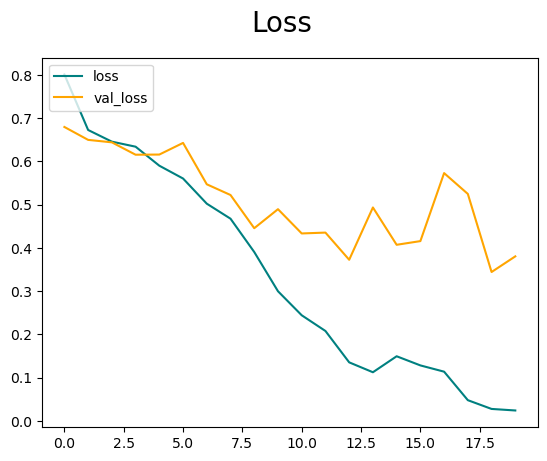

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

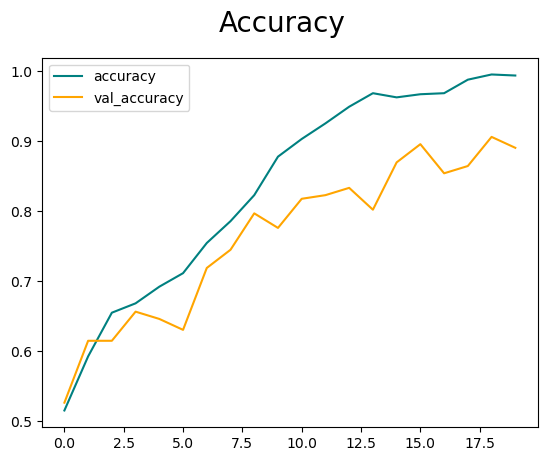

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
len(test)

3

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 124ms/step


In [49]:
print(f'{pre.result().numpy()}, {re.result().numpy()}, {acc.result().numpy()}')

0.9811320900917053, 0.8965517282485962, 0.9270833134651184


# 10. Test

In [50]:
import cv2

In [51]:
img = cv2.imread('easy.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

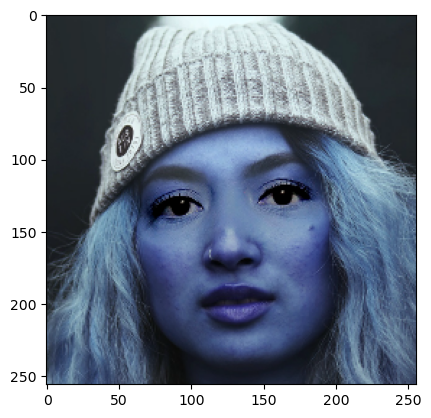

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
# resize
resize.shape

TensorShape([256, 256, 3])

In [54]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 287ms/step


In [56]:
print(yhat)
if yhat > 0.5:
    print(f'Predicted is real')
else:
    print(f'Predicted is fake')

[[0.00036343]]
Predicted is fake


1/1 [==============================] - 0s 33ms/step


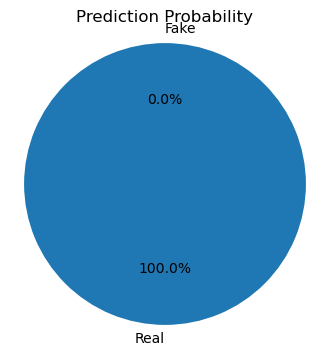

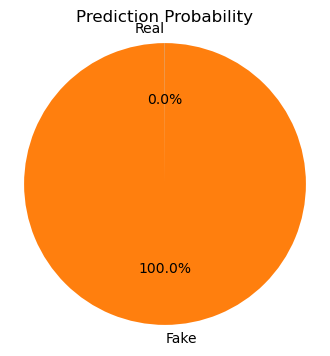

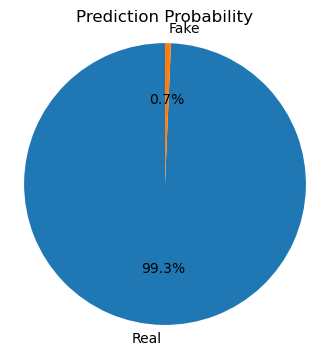

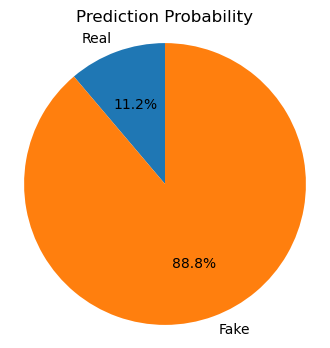

In [57]:
import cv2
import numpy as np
import tensorflow as tf
import shutil
import os
import matplotlib.pyplot as plt  # Import matplotlib
from tkinter import *
# from tkinter import ttk
from tkinter import filedialog


# Define your model here if not already done.
# Define the labels for your pie chart
labels = ['Real', 'Fake']

# Create an instance of Tkinter frame
win = Tk()

# Set the geometry of Tkinter frame
win.geometry("750x400")  # Increased height to accommodate the pie chart
absolute_path =""
def open_image():
    global absolute_path  # Declare absolute_path as a global variable
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png *.jpg *.jpeg *.gif *.bmp")])
    if file_path:
        # Define the destination folder where the image will be saved
        destination_folder = "image_folder"
        os.makedirs(destination_folder, exist_ok=True)
        
        # Extract the file name from the full path
        file_name = file_path.split("/")[-1]

        # Build the destination path
        destination_path = os.path.join(destination_folder, file_name)

        # Copy the image to the destination folder
        shutil.copy(file_path, destination_path)

        # Get the absolute path of the saved image
        absolute_path = os.path.abspath(destination_path)

        label1.config(text=f"Image Saved at: {absolute_path}")

        


def display_text():

        img = cv2.imread(absolute_path)

        if img is not None:
            resize = cv2.resize(img, (256, 256))  # Use cv2.resize for image resizing
            yhat = model.predict(np.expand_dims(resize / 255, 0))

            if yhat > 0.5:
                label.configure(text='Predicted class is Real')
            else:
                label.configure(text='Predicted class is Fake')

            # Create and display the pie chart
            pie_chart(yhat)

        else:
            label.configure(text='Failed to read the image. Check the file path.')



def pie_chart(yhat):
    # Ensure yhat is a 1D array
    yhat = yhat.ravel()

    # Create a pie chart based on yhat
    plt.figure(figsize=(4, 4))
    plt.pie([yhat[0], 1 - yhat[0]], labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Prediction Probability')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Save the pie chart to an image file (temporary)
    plt.savefig('pie_chart.png')

    # Display the pie chart in Tkinter using a PhotoImage
    pie_image = PhotoImage(file='pie_chart.png')

    # Clear the canvas and re-draw the pie chart at the desired location
    pie_canvas.delete("all")
    pie_canvas.create_image(170, 175, image=pie_image )  # Adjust the (x, y) coordinates as needed
    pie_canvas.image = pie_image

# Label
label = Label(win, text="", font=("Courier 22 bold"))
label.pack()

label1 = Label(win, text="", padx=10, pady=10)
label1.pack()


# Create an Entry widget to accept User Input
open_button = Button(win, text="Click To Open Image", command=open_image)
open_button.pack()

# Create a Button to validate Entry Widget
Button(win, text="Okay", width=20, command=display_text).pack(pady=20)

# Create a canvas to display the pie chart
pie_canvas = Canvas(win, width=350, height=350,  highlightthickness=0)
pie_canvas.pack()

# Create a label to display the pie chart
pie_label = Label(win)
pie_label.pack()

win.mainloop()
